In [59]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import sklearn as sk
import missingno as ms
from pandas import DataFrame
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from sklearn.metrics import mean_squared_error
from math import sqrt

In [60]:
DF=pd.read_csv('Stock Market Dataset.csv',parse_dates =["Date"], index_col ="Date")

In [61]:
DF

,Unnamed: 0,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Price,Bitcoin_Vol.,Platinum_Price,...,Berkshire_Price,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.
Date,,,,,,,,,,,,,,,,,,,,,
02-02-2024,0,2.079,NaN,72.28,NaN,3.8215,NaN,"43,194.70",42650.0,901.6,...,"5,89,498",10580.0,564.64,4030000.0,171.81,117220000.0,474.99,84710000.0,"2,053.70",NaN
01-02-2024,1,2.050,161340.0,73.82,577940.0,3.8535,NaN,"43,081.40",47690.0,922.3,...,"5,81,600",9780.0,567.51,3150000.0,159.28,66360000.0,394.78,25140000.0,"2,071.10",260920.0
31-01-2024,2,2.100,142860.0,75.85,344490.0,3.9060,NaN,"42,580.50",56480.0,932.6,...,"5,78,020",9720.0,564.11,4830000.0,155.20,49690000.0,390.14,20010000.0,"2,067.40",238370.0
30-01-2024,3,2.077,139750.0,77.82,347240.0,3.9110,NaN,"42,946.20",55130.0,931.7,...,"5,84,680",9750.0,562.85,6120000.0,159.00,42290000.0,400.06,18610000.0,"2,050.90",214590.0
29-01-2024,4,2.490,3590.0,76.78,331930.0,3.8790,NaN,"43,299.80",45230.0,938.3,...,"5,78,800",13850.0,575.79,6880000.0,161.26,42840000.0,401.02,17790000.0,"2,034.90",1780.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
08-02-2019,1238,2.583,147880.0,52.72,621000.0,2.8140,270.0,"3,661.70",699230.0,802.2,...,"3,00,771",240.0,347.57,7560000.0,79.41,113150000.0,167.33,12560000.0,"1,318.50",150610.0
07-02-2019,1239,2.551,211790.0,52.64,749010.0,2.8320,320.0,"3,397.70",471360.0,800.8,...,"3,02,813",240.0,344.71,7860000.0,80.72,92530000.0,166.38,17520000.0,"1,314.20",166760.0
06-02-2019,1240,2.662,98330.0,54.01,606720.0,2.8400,100.0,"3,404.30",514210.0,807.1,...,"3,08,810",120.0,352.19,6720000.0,82.01,78800000.0,170.49,13280000.0,"1,314.40",137250.0


In [62]:
MY_DATA= DF[['Natural_Gas_Price',
 'Crude_oil_Price',
 'Copper_Price',
 'Bitcoin_Price',
 'Platinum_Price',
 'Ethereum_Price',
 'S&P_500_Price',
 'Nasdaq_100_Price',
 'Apple_Price',
 'Tesla_Price',
 'Microsoft_Price',
 'Silver_Price',
 'Google_Price',
 'Nvidia_Price',
 'Berkshire_Price',
 'Netflix_Price',
 'Amazon_Price',
 'Meta_Price',
 'Gold_Price']]

In [63]:
MY_DATA

,Natural_Gas_Price,Crude_oil_Price,Copper_Price,Bitcoin_Price,Platinum_Price,Ethereum_Price,S&P_500_Price,Nasdaq_100_Price,Apple_Price,Tesla_Price,Microsoft_Price,Silver_Price,Google_Price,Nvidia_Price,Berkshire_Price,Netflix_Price,Amazon_Price,Meta_Price,Gold_Price
Date,,,,,,,,,,,,,,,,,,,
02-02-2024,2.079,72.28,3.8215,"43,194.70",901.6,"2,309.28","4,958.61","17,642.73",185.85,187.91,411.22,22.796,142.38,661.60,"5,89,498",564.64,171.81,474.99,"2,053.70"
01-02-2024,2.050,73.82,3.8535,"43,081.40",922.3,"2,304.28","4,906.19","17,344.71",186.86,188.86,403.78,23.236,141.16,630.27,"5,81,600",567.51,159.28,394.78,"2,071.10"
31-01-2024,2.100,75.85,3.9060,"42,580.50",932.6,"2,283.14","4,848.87","17,137.24",184.40,187.29,397.58,23.169,140.10,615.27,"5,78,020",564.11,155.20,390.14,"2,067.40"
30-01-2024,2.077,77.82,3.9110,"42,946.20",931.7,"2,343.11","4,924.97","17,476.71",188.04,191.59,408.59,23.225,151.46,627.74,"5,84,680",562.85,159.00,400.06,"2,050.90"
29-01-2024,2.490,76.78,3.8790,"43,299.80",938.3,"2,317.79","4,927.93","17,596.27",191.73,190.93,409.72,23.134,153.51,624.65,"5,78,800",575.79,161.26,401.02,"2,034.90"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
08-02-2019,2.583,52.72,2.8140,"3,661.70",802.2,119.23,"2,707.88","6,913.13",42.60,20.39,105.67,15.809,55.12,37.04,"3,00,771",347.57,79.41,167.33,"1,318.50"
07-02-2019,2.551,52.64,2.8320,"3,397.70",800.8,104.55,"2,706.05","6,904.98",42.73,20.50,105.27,15.713,55.30,36.85,"3,02,813",344.71,80.72,166.38,"1,314.20"
06-02-2019,2.662,54.01,2.8400,"3,404.30",807.1,104.63,"2,731.61","6,997.62",43.56,21.15,106.03,15.701,56.14,38.25,"3,08,810",352.19,82.01,170.49,"1,314.40"


In [64]:
MY_DATA.describe()

,Natural_Gas_Price,Crude_oil_Price,Copper_Price,Apple_Price,Tesla_Price,Microsoft_Price,Silver_Price,Google_Price,Nvidia_Price,Netflix_Price,Amazon_Price,Meta_Price
count,1243.000000,1243.000000,1243.000000,1243.000000,1243.000000,1243.000000,1243.000000,1243.000000,1243.000000,1243.000000,1243.000000,1243.000000
mean,3.494714,67.577064,3.541957,125.566533,173.590442,241.240072,21.588977,99.670829,187.285841,404.839541,128.683234,239.728134
std,1.822540,20.465500,0.702819,46.114122,106.688094,73.429838,3.859288,29.766893,134.679941,114.989473,30.808631,71.015427
min,1.482000,-37.630000,2.100500,42.360000,11.930000,105.250000,11.772000,51.940000,33.450000,166.370000,79.410000,88.910000
25%,2.347500,55.095000,2.858750,79.505000,53.335000,182.525000,17.998500,71.185000,73.905000,323.010000,96.260000,183.355000
50%,2.702000,69.230000,3.666000,136.760000,202.070000,245.380000,22.758000,101.240000,151.590000,384.150000,128.730000,224.430000
75%,4.055500,80.455000,4.137250,162.915000,251.470000,297.120000,24.512000,127.205000,242.140000,495.365000,158.110000,301.650000
max,9.647000,123.700000,4.937500,198.110000,409.970000,411.220000,29.418000,153.510000,661.600000,691.690000,186.570000,474.990000


In [65]:
MY_DATA.dtypes

Natural_Gas_Price    float64
Crude_oil_Price      float64
Copper_Price         float64
Bitcoin_Price         object
Platinum_Price        object
Ethereum_Price        object
S&P_500_Price         object
Nasdaq_100_Price      object
Apple_Price          float64
Tesla_Price          float64
Microsoft_Price      float64
Silver_Price         float64
Google_Price         float64
Nvidia_Price         float64
Berkshire_Price       object
Netflix_Price        float64
Amazon_Price         float64
Meta_Price           float64
Gold_Price            object
dtype: object

In [66]:
MY_DATA.convert_dtypes().dtypes

Natural_Gas_Price           Float64
Crude_oil_Price             Float64
Copper_Price                Float64
Bitcoin_Price        string[python]
Platinum_Price       string[python]
Ethereum_Price       string[python]
S&P_500_Price        string[python]
Nasdaq_100_Price     string[python]
Apple_Price                 Float64
Tesla_Price                 Float64
Microsoft_Price             Float64
Silver_Price                Float64
Google_Price                Float64
Nvidia_Price                Float64
Berkshire_Price      string[python]
Netflix_Price               Float64
Amazon_Price                Float64
Meta_Price                  Float64
Gold_Price           string[python]
dtype: object

In [67]:
stocks=MY_DATA.replace(',','', regex=True)

In [68]:
stocks.dtypes

Natural_Gas_Price    float64
Crude_oil_Price      float64
Copper_Price         float64
Bitcoin_Price         object
Platinum_Price        object
Ethereum_Price        object
S&P_500_Price         object
Nasdaq_100_Price      object
Apple_Price          float64
Tesla_Price          float64
Microsoft_Price      float64
Silver_Price         float64
Google_Price         float64
Nvidia_Price         float64
Berkshire_Price       object
Netflix_Price        float64
Amazon_Price         float64
Meta_Price           float64
Gold_Price            object
dtype: object

In [69]:
stocks['Copper_Price'] = stocks['Copper_Price'].round(2)
stocks['Silver_Price'] = stocks['Silver_Price'].round(2)

In [70]:
stocks

,Natural_Gas_Price,Crude_oil_Price,Copper_Price,Bitcoin_Price,Platinum_Price,Ethereum_Price,S&P_500_Price,Nasdaq_100_Price,Apple_Price,Tesla_Price,Microsoft_Price,Silver_Price,Google_Price,Nvidia_Price,Berkshire_Price,Netflix_Price,Amazon_Price,Meta_Price,Gold_Price
Date,,,,,,,,,,,,,,,,,,,
02-02-2024,2.079,72.28,3.82,43194.70,901.6,2309.28,4958.61,17642.73,185.85,187.91,411.22,22.80,142.38,661.60,589498,564.64,171.81,474.99,2053.70
01-02-2024,2.050,73.82,3.85,43081.40,922.3,2304.28,4906.19,17344.71,186.86,188.86,403.78,23.24,141.16,630.27,581600,567.51,159.28,394.78,2071.10
31-01-2024,2.100,75.85,3.91,42580.50,932.6,2283.14,4848.87,17137.24,184.40,187.29,397.58,23.17,140.10,615.27,578020,564.11,155.20,390.14,2067.40
30-01-2024,2.077,77.82,3.91,42946.20,931.7,2343.11,4924.97,17476.71,188.04,191.59,408.59,23.22,151.46,627.74,584680,562.85,159.00,400.06,2050.90
29-01-2024,2.490,76.78,3.88,43299.80,938.3,2317.79,4927.93,17596.27,191.73,190.93,409.72,23.13,153.51,624.65,578800,575.79,161.26,401.02,2034.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
08-02-2019,2.583,52.72,2.81,3661.70,802.2,119.23,2707.88,6913.13,42.60,20.39,105.67,15.81,55.12,37.04,300771,347.57,79.41,167.33,1318.50
07-02-2019,2.551,52.64,2.83,3397.70,800.8,104.55,2706.05,6904.98,42.73,20.50,105.27,15.71,55.30,36.85,302813,344.71,80.72,166.38,1314.20
06-02-2019,2.662,54.01,2.84,3404.30,807.1,104.63,2731.61,6997.62,43.56,21.15,106.03,15.70,56.14,38.25,308810,352.19,82.01,170.49,1314.40


In [71]:
stocks['S&P_500_Price']=stocks['S&P_500_Price'].astype(float)
stocks['Bitcoin_Price']=stocks['Bitcoin_Price'].astype(float)
stocks['Platinum_Price']=stocks['Platinum_Price'].astype(float)
stocks['Ethereum_Price']=stocks['Ethereum_Price'].astype(float)
stocks['Nasdaq_100_Price']=stocks['Nasdaq_100_Price'].astype(float)
stocks['Berkshire_Price']=stocks['Berkshire_Price'].astype(float)
stocks['Gold_Price']=stocks['Gold_Price'].astype(float)

In [72]:
stocks.dtypes

Natural_Gas_Price    float64
Crude_oil_Price      float64
Copper_Price         float64
Bitcoin_Price        float64
Platinum_Price       float64
Ethereum_Price       float64
S&P_500_Price        float64
Nasdaq_100_Price     float64
Apple_Price          float64
Tesla_Price          float64
Microsoft_Price      float64
Silver_Price         float64
Google_Price         float64
Nvidia_Price         float64
Berkshire_Price      float64
Netflix_Price        float64
Amazon_Price         float64
Meta_Price           float64
Gold_Price           float64
dtype: object

In [73]:
Stocks=stocks.copy(deep=True) 

In [74]:
Stocks

,Natural_Gas_Price,Crude_oil_Price,Copper_Price,Bitcoin_Price,Platinum_Price,Ethereum_Price,S&P_500_Price,Nasdaq_100_Price,Apple_Price,Tesla_Price,Microsoft_Price,Silver_Price,Google_Price,Nvidia_Price,Berkshire_Price,Netflix_Price,Amazon_Price,Meta_Price,Gold_Price
Date,,,,,,,,,,,,,,,,,,,
02-02-2024,2.079,72.28,3.82,43194.7,901.60,2309.28,4958.61,17642.73,185.85,187.91,411.22,22.80,142.38,661.60,589498.0,564.64,171.81,474.99,2053.7
01-02-2024,2.050,73.82,3.85,43081.4,922.30,2304.28,4906.19,17344.71,186.86,188.86,403.78,23.24,141.16,630.27,581600.0,567.51,159.28,394.78,2071.1
31-01-2024,2.100,75.85,3.91,42580.5,932.60,2283.14,4848.87,17137.24,184.40,187.29,397.58,23.17,140.10,615.27,578020.0,564.11,155.20,390.14,2067.4
30-01-2024,2.077,77.82,3.91,42946.2,931.70,2343.11,4924.97,17476.71,188.04,191.59,408.59,23.22,151.46,627.74,584680.0,562.85,159.00,400.06,2050.9
29-01-2024,2.490,76.78,3.88,43299.8,938.30,2317.79,4927.93,17596.27,191.73,190.93,409.72,23.13,153.51,624.65,578800.0,575.79,161.26,401.02,2034.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
08-02-2019,2.583,52.72,2.81,3661.7,802.20,119.23,2707.88,6913.13,42.60,20.39,105.67,15.81,55.12,37.04,300771.0,347.57,79.41,167.33,1318.5
07-02-2019,2.551,52.64,2.83,3397.7,800.80,104.55,2706.05,6904.98,42.73,20.50,105.27,15.71,55.30,36.85,302813.0,344.71,80.72,166.38,1314.2
06-02-2019,2.662,54.01,2.84,3404.3,807.10,104.63,2731.61,6997.62,43.56,21.15,106.03,15.70,56.14,38.25,308810.0,352.19,82.01,170.49,1314.4


In [75]:
Stocks=Stocks[['Copper_Price','Platinum_Price','Silver_Price','Gold_Price']]

In [76]:
Stocks.dtypes

Copper_Price      float64
Platinum_Price    float64
Silver_Price      float64
Gold_Price        float64
dtype: object

In [77]:
Stocks.index = pd.to_datetime(Stocks.index,dayfirst=True)

In [78]:
#below you can use this method to view other columns like silver,platinum and gold prices.it just example and you can also use subplot to view all  

Date
2019-02-28    2.860556
2019-03-31    2.902381
2019-04-30    2.918095
2019-05-31    2.735000
2019-06-30    2.677500
2019-07-31    2.691364
2019-08-31    2.581818
2019-09-30    2.609500
2019-10-31    2.620435
2019-11-30    2.663000
2019-12-31    2.770476
2020-01-31    2.745238
2020-02-29    2.580526
2020-03-31    2.353636
2020-04-30    2.294286
2020-05-31    2.378421
2020-06-30    2.605000
2020-07-31    2.884762
2020-08-31    2.929048
2020-09-30    3.027000
2020-10-31    3.059091
2020-11-30    3.199474
2020-12-31    3.538636
2021-01-31    3.618333
2021-02-28    3.851667
2021-03-31    4.079565
2021-04-30    4.227619
2021-05-31    4.623500
2021-06-30    4.381429
2021-07-31    4.352000
2021-08-31    4.290000
2021-09-30    4.264500
Freq: ME, Name: Copper_Price, dtype: float64


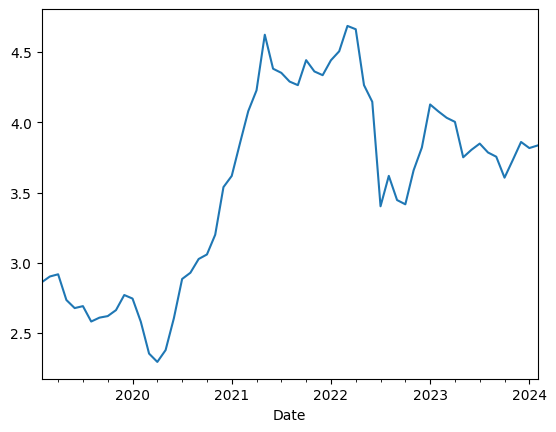

In [79]:
up_samp = Stocks['Copper_Price'].resample('ME').mean()
interpolated = up_samp.interpolate(method='linear')
print(interpolated.head(32))
interpolated.plot()
plt.show()

In [80]:
DEMO=Stocks.copy(deep=True) 

In [81]:
DEMO_1=DEMO[['Copper_Price']]

In [82]:
DEMO_11=DEMO_1.sort_index()

In [83]:
DEMO_11

,Copper_Price
Date,
2019-02-04,2.80
2019-02-05,2.82
2019-02-06,2.84
2019-02-07,2.83
2019-02-08,2.81
...,...
2024-01-29,3.88
2024-01-30,3.91
2024-01-31,3.91


In [84]:
DEMO_11.describe()

,Copper_Price
count,1243.000000
mean,3.541923
std,0.702869
min,2.100000
25%,2.860000
50%,3.670000
75%,4.140000
max,4.940000


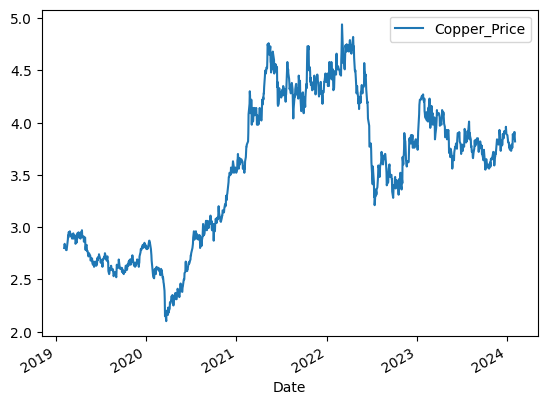

In [85]:
DEMO_11.plot()
plt.show()

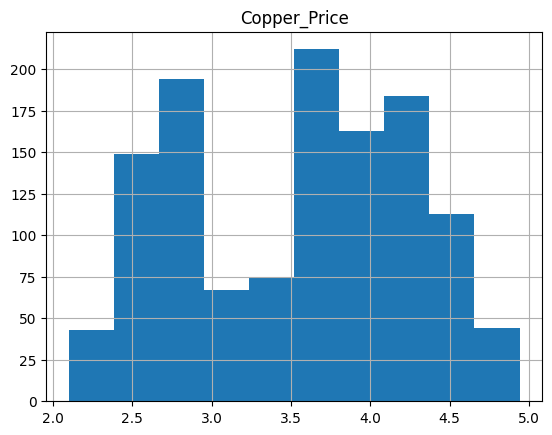

In [86]:
DEMO_11.hist()
plt.show()

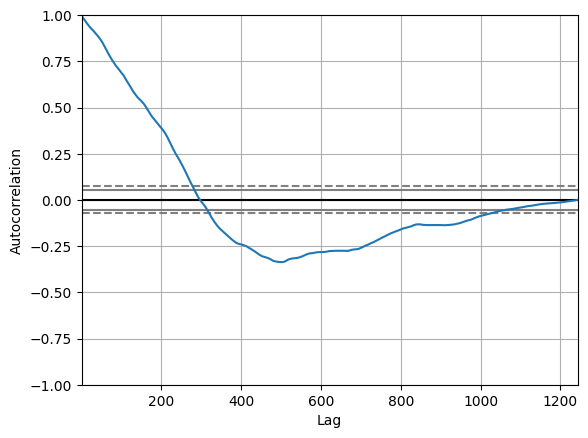

In [87]:
autocorrelation_plot(DEMO_11)
plt.show()

In [88]:
P= DEMO_11.values
result = adfuller(P)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.519670
p-value: 0.523759
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568


In [89]:
Stocks_M=Stocks.sort_index()

In [90]:
Stocks_M

,Copper_Price,Platinum_Price,Silver_Price,Gold_Price
Date,,,,
2019-02-04,2.80,822.50,15.89,1319.3
2019-02-05,2.82,821.35,15.84,1319.2
2019-02-06,2.84,807.10,15.70,1314.4
2019-02-07,2.83,800.80,15.71,1314.2
2019-02-08,2.81,802.20,15.81,1318.5
...,...,...,...,...
2024-01-29,3.88,938.30,23.13,2034.9
2024-01-30,3.91,931.70,23.22,2050.9
2024-01-31,3.91,932.60,23.17,2067.4


In [91]:
T = Stocks_M.values
train_size = int(len(T) * 0.66)
train, test = T[0:train_size], T[train_size:len(T)]
print('Observations: %d' % (len(T)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))

Observations: 1243
Training Observations: 820
Testing Observations: 423


In [92]:
train_1=pd.DataFrame(train)

In [93]:
train_1

,0,1,2,3
0,2.80,822.50,15.89,1319.3
1,2.82,821.35,15.84,1319.2
2,2.84,807.10,15.70,1314.4
3,2.83,800.80,15.71,1314.2
4,2.81,802.20,15.81,1318.5
...,...,...,...,...
815,4.21,926.90,21.55,1814.0
816,4.25,944.00,21.75,1818.9
817,4.19,925.00,21.54,1815.9
818,4.29,953.50,21.91,1841.2


In [94]:
test_1=pd.DataFrame(test)
test_1

,0,1,2,3
0,4.36,951.2,21.72,1847.8
1,4.32,944.4,22.06,1865.4
2,4.28,930.8,21.87,1846.3
3,4.28,938.1,21.96,1847.6
4,4.33,945.1,22.10,1857.3
...,...,...,...,...
418,3.88,938.3,23.13,2034.9
419,3.91,931.7,23.22,2050.9
420,3.91,932.6,23.17,2067.4
421,3.85,922.3,23.24,2071.1


In [95]:
Stocks_M

,Copper_Price,Platinum_Price,Silver_Price,Gold_Price
Date,,,,
2019-02-04,2.80,822.50,15.89,1319.3
2019-02-05,2.82,821.35,15.84,1319.2
2019-02-06,2.84,807.10,15.70,1314.4
2019-02-07,2.83,800.80,15.71,1314.2
2019-02-08,2.81,802.20,15.81,1318.5
...,...,...,...,...
2024-01-29,3.88,938.30,23.13,2034.9
2024-01-30,3.91,931.70,23.22,2050.9
2024-01-31,3.91,932.60,23.17,2067.4


In [96]:
Stocks_P=Stocks_M[['Copper_Price']]

In [97]:
Stocks_P

,Copper_Price
Date,
2019-02-04,2.80
2019-02-05,2.82
2019-02-06,2.84
2019-02-07,2.83
2019-02-08,2.81
...,...
2024-01-29,3.88
2024-01-30,3.91
2024-01-31,3.91


In [98]:
values = pd.DataFrame(Stocks_P.values)
dataframe_v=pd.concat([values.shift(1), values], axis=1)
dataframe_v.columns = ['t', 't+1']
dataframe_TT=dataframe_v.drop(0, axis=0)

In [99]:
dataframe_TT

,t,t+1
1,2.80,2.82
2,2.82,2.84
3,2.84,2.83
4,2.83,2.81
5,2.81,2.79
...,...,...
1238,3.85,3.88
1239,3.88,3.91
1240,3.91,3.91
1241,3.91,3.85


      0
0  0.07
1 -0.04
2 -0.04
3  0.00
4  0.05


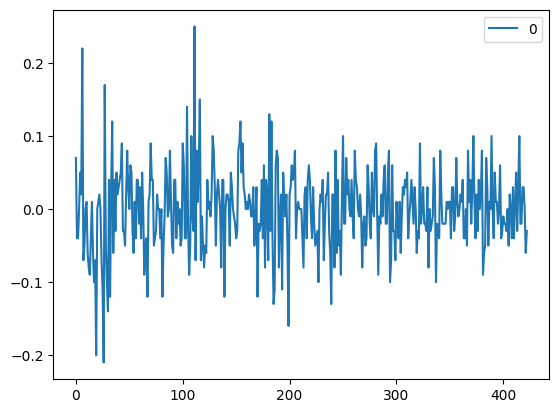

In [100]:
X = dataframe_TT.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
predictions = [x for x in test_X]
residuals = [test_y[i]-predictions[i] for i in range(len(predictions))]
residuals = DataFrame(residuals)
print(residuals.head())
residuals.plot()
plt.show()

In [101]:
print(residuals.describe())

                0
count  423.000000
mean    -0.001111
std      0.055775
min     -0.210000
25%     -0.040000
50%      0.000000
75%      0.030000
max      0.250000


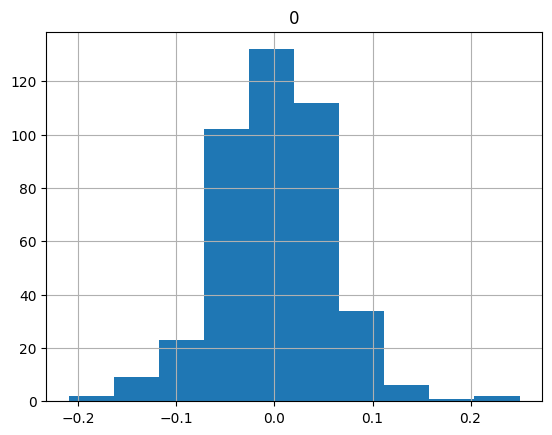

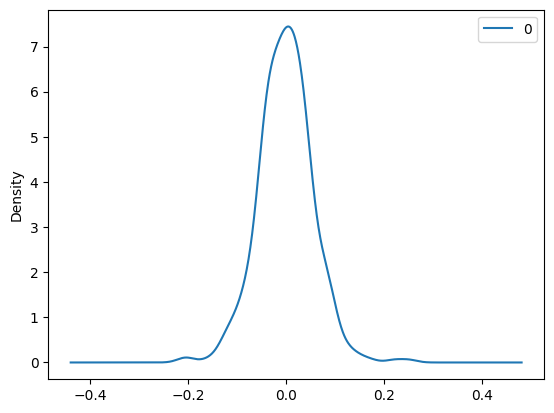

In [102]:
residuals.hist()
plt.show()

residuals.plot(kind='kde')
plt.show()

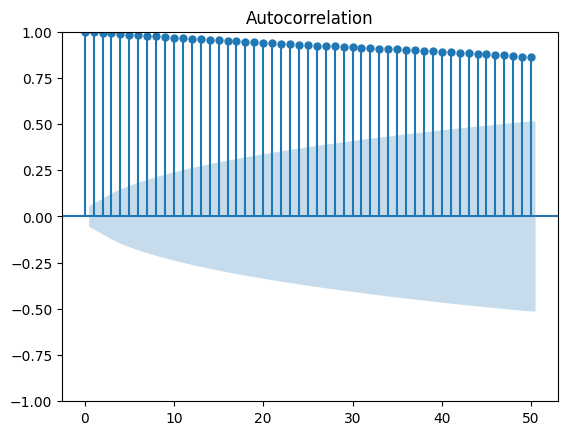

In [103]:
plot_acf(Stocks_P, lags=50)
plt.show()

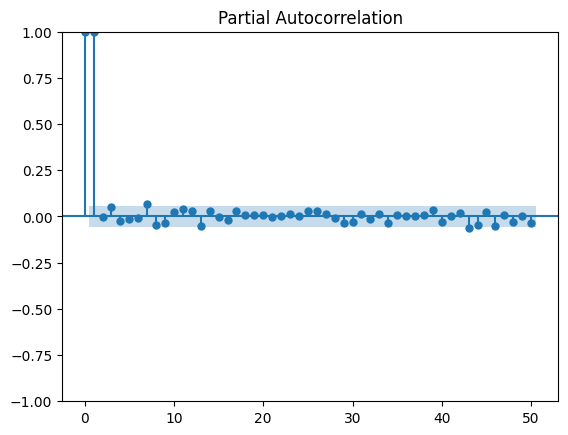

In [104]:
plot_pacf(Stocks_P, lags=50)
plt.show()

In [105]:
Stocks_M

,Copper_Price,Platinum_Price,Silver_Price,Gold_Price
Date,,,,
2019-02-04,2.80,822.50,15.89,1319.3
2019-02-05,2.82,821.35,15.84,1319.2
2019-02-06,2.84,807.10,15.70,1314.4
2019-02-07,2.83,800.80,15.71,1314.2
2019-02-08,2.81,802.20,15.81,1318.5
...,...,...,...,...
2024-01-29,3.88,938.30,23.13,2034.9
2024-01-30,3.91,931.70,23.22,2050.9
2024-01-31,3.91,932.60,23.17,2067.4


In [106]:
Stocks_ARIMA=Stocks_M[['Silver_Price']]

In [107]:
size=len(Stocks_ARIMA)

In [108]:
print(size)

1243


In [109]:
split_point = len(Stocks_ARIMA) - 13
dataset_ARIMA, validation_ARIMA = Stocks_ARIMA[0:split_point], Stocks_ARIMA[split_point:]
print('Dataset %d, Validation %d' % (len(dataset_ARIMA), len(validation_ARIMA)))

Dataset 1230, Validation 13


In [110]:
dataset_ARIMA

,Silver_Price
Date,
2019-02-04,15.89
2019-02-05,15.84
2019-02-06,15.70
2019-02-07,15.71
2019-02-08,15.81
...,...
2024-01-09,23.09
2024-01-10,22.96
2024-01-11,22.60


In [112]:
                                                              #Persistence Model

In [113]:
ARIMA_df =dataset_ARIMA.values

train_size = int(len(ARIMA_df) * 0.50)
train_f, test_f = ARIMA_df[0:train_size], ARIMA_df[train_size:]
hist = [x for x in train_f]
pred = list()

for i in range(len(test_f)):
  y = hist[-1]
  pred.append(y)
  o = test_f[i]
  hist.append(o)
  print('>Predicted=%.3f, Expected=%.3f' % (y, o))
    
rmse = sqrt(mean_squared_error(test_f, pred))
print('RMSE: %.3f' % rmse)

>Predicted=25.230, Expected=25.320
>Predicted=25.320, Expected=24.650
>Predicted=24.650, Expected=24.880
>Predicted=24.880, Expected=25.780
>Predicted=25.780, Expected=25.550
>Predicted=25.550, Expected=25.580
>Predicted=25.580, Expected=25.580
>Predicted=25.580, Expected=25.460
>Predicted=25.460, Expected=25.290
>Predicted=25.290, Expected=24.330
>Predicted=24.330, Expected=23.270
>Predicted=23.270, Expected=23.390
>Predicted=23.390, Expected=23.490
>Predicted=23.490, Expected=23.120
>Predicted=23.120, Expected=23.780
>Predicted=23.780, Expected=23.790
>Predicted=23.790, Expected=23.660
>Predicted=23.660, Expected=23.420
>Predicted=23.420, Expected=23.230
>Predicted=23.230, Expected=23.110
>Predicted=23.110, Expected=23.660
>Predicted=23.660, Expected=23.890
>Predicted=23.890, Expected=23.780
>Predicted=23.780, Expected=23.550
>Predicted=23.550, Expected=24.110
>Predicted=24.110, Expected=24.010
>Predicted=24.010, Expected=24.010
>Predicted=24.010, Expected=24.220
>Predicted=24.220, E

C:\Users\Vimal kanth\AppData\Local\Temp\ipykernel_26104\1408184136.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('>Predicted=%.3f, Expected=%.3f' % (y, o))


In [114]:
                                                                   #ARIMA Model

C:\Users\Vimal kanth\AppData\Local\Temp\ipykernel_26104\3693044490.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('>Predicted=%.3f, Expected=%.3f' % (Y_2, O))


>Predicted=25.289, Expected=25.320
>Predicted=25.272, Expected=24.650
>Predicted=24.735, Expected=24.880
>Predicted=24.810, Expected=25.780
>Predicted=25.672, Expected=25.550
>Predicted=25.708, Expected=25.580
>Predicted=25.541, Expected=25.580
>Predicted=25.485, Expected=25.460
>Predicted=25.476, Expected=25.290
>Predicted=25.310, Expected=24.330
>Predicted=24.456, Expected=23.270
>Predicted=23.361, Expected=23.390
>Predicted=23.335, Expected=23.490
>Predicted=23.607, Expected=23.120
>Predicted=23.308, Expected=23.780
>Predicted=23.681, Expected=23.790
>Predicted=23.824, Expected=23.660
>Predicted=23.707, Expected=23.420
>Predicted=23.386, Expected=23.230
>Predicted=23.221, Expected=23.110
>Predicted=23.130, Expected=23.660
>Predicted=23.609, Expected=23.890
>Predicted=23.925, Expected=23.780
>Predicted=23.821, Expected=23.550
>Predicted=23.516, Expected=24.110
>Predicted=23.980, Expected=24.010
>Predicted=24.068, Expected=24.010
>Predicted=24.023, Expected=24.220
>Predicted=24.141, E

C:\Users\Vimal kanth\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


>Predicted=25.859, Expected=25.660
>Predicted=25.707, Expected=24.420
>Predicted=24.542, Expected=24.150
>Predicted=24.128, Expected=24.180
>Predicted=24.177, Expected=23.780
>Predicted=23.873, Expected=23.790
>Predicted=23.788, Expected=23.520
>Predicted=23.545, Expected=23.950
>Predicted=23.913, Expected=23.740
>Predicted=23.777, Expected=23.510
>Predicted=23.537, Expected=23.130
>Predicted=23.141, Expected=22.800
>Predicted=22.826, Expected=23.250
>Predicted=23.202, Expected=23.240
>Predicted=23.273, Expected=23.590
>Predicted=23.569, Expected=23.990
>Predicted=23.945, Expected=23.750
>Predicted=23.790, Expected=23.640
>Predicted=23.627, Expected=23.670
>Predicted=23.645, Expected=23.530
>Predicted=23.555, Expected=24.350
>Predicted=24.268, Expected=24.410
>Predicted=24.433, Expected=24.060
>Predicted=24.104, Expected=23.820
>Predicted=23.795, Expected=24.100
>Predicted=24.061, Expected=23.890
>Predicted=23.936, Expected=24.080
>Predicted=24.064, Expected=23.190
>Predicted=23.274, E

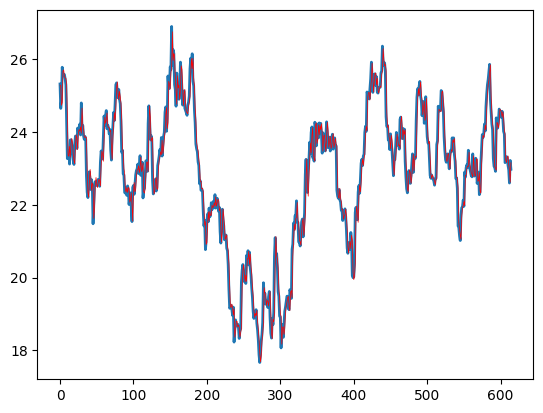

In [118]:
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.arima.model import ARIMA


ARIMA_FINAL =dataset_ARIMA.values

train_Final = int(len(ARIMA_FINAL) * 0.50)

trainF, testF = ARIMA_FINAL[0:train_Final], ARIMA_FINAL[train_Final:]
H= [x for x in trainF]
P= list()
for t in range(len(testF)):
    model = ARIMA(H, order=(5,1,0))
    model_fit = model.fit()
    Y = model_fit.forecast()
    Y_2=Y[0]
    P.append(Y_2)
    O = testF[t]
    H.append(O)
    print('>Predicted=%.3f, Expected=%.3f' % (Y_2, O))
RMSE = sqrt(mean_squared_error(testF, P)) 

print('RMSE: %.3f' % RMSE)
plt.plot(testF,linewidth=2.0)
plt.plot(P, color='red',linewidth=0.5)
plt.show()



In [ ]:
                                                   # above RED is prediction